In [20]:
# !pip3 install --pre torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/nightly/cpu
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
# !pip install opencv-python

/Users/a4923/Desktop/repositories/clone_Pochade/canvas/Human-Pose-Estimate/detectron


In [6]:
import torch, detectron2

In [8]:
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
print("torch: ", TORCH_VERSION)
print("detectron2:", detectron2.__version__)

torch:  1.13
detectron2: 0.6


In [16]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

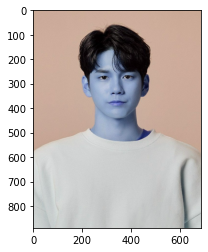

In [18]:
!wget http://file3.instiz.net/data/cached_img/upload/2020/03/11/0/08b1fa3932af5c691d827ca356296950.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")

plt.imshow(im)

In [19]:
MODEL_NAME = "R_50_FPN_WC1M_s1x"
mps_device = torch.device("mps") 

cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

AssertionError: Torch not compiled with CUDA enabled